In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing dataset
df = pd.read_csv('C:\\Users\\Asus\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# checking null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# we can see that,the data type of some columns is not correct.

<AxesSubplot:ylabel='Churn'>

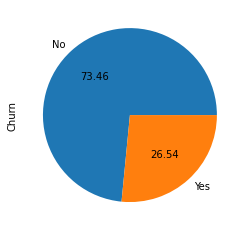

In [6]:
df['Churn'].value_counts().plot(kind='pie',autopct='%0.2f')

#  dataset is little imbalance

In [7]:
# Drop customer_id column
df.drop(['customerID'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
# changing the data type of TotalCharges column
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [11]:
# removing space

In [12]:
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# droping null values
df.dropna(inplace=True)

In [15]:
df.shape

(7032, 20)

In [16]:
# let's do some visualization

In [17]:
# find out customer loyalty
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [18]:
df_churn_yes = df[df['Churn']=='Yes'].tenure
df_churn_no = df[df['Churn']=='No'].tenure

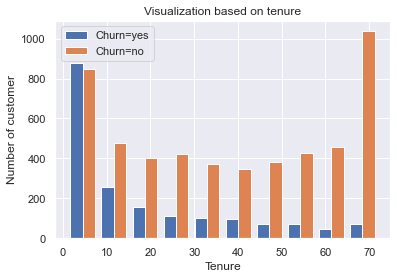

In [19]:
plt.hist([df_churn_yes,df_churn_no],label=['Churn=yes','Churn=no'])
plt.title('Visualization based on tenure')
plt.ylabel('Number of customer')
plt.xlabel('Tenure')
plt.legend()

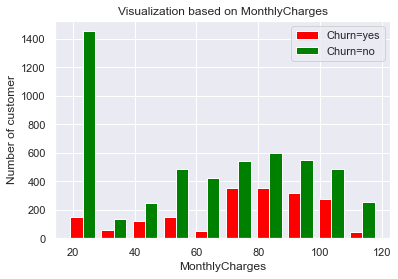

In [20]:
df_churn_yes = df[df['Churn']=='Yes'].MonthlyCharges
df_churn_no = df[df['Churn']=='No'].MonthlyCharges

plt.hist([df_churn_yes,df_churn_no],label=['Churn=yes','Churn=no'],color=['red','green'])
plt.title('Visualization based on MonthlyCharges')
plt.ylabel('Number of customer')
plt.xlabel('MonthlyCharges')
plt.legend()

# we can see customer lie between 70 to 100 monthly charges are leaving more

In [21]:
# finding unique values in columns 

In [22]:
for i in df:
    print(f'{i} :  {df[i].unique()}')

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 

In [23]:
# First look on categorical comuns
def unique_values(df):
    for i in df:
        if df[i].dtype == 'object':
            print(f'{i} :  {df[i].unique()}')

In [24]:
unique_values(df)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [25]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [26]:
unique_values(df)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [27]:
df['gender'] = df['gender'].replace({'Female':1,'Male':0})

In [28]:
col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','OnlineBackup',
      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in col:
    df[i].replace({'Yes':1,'No':0},inplace=True)

In [29]:
unique_values(df)

InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
# converting remaning columns into numeric data type by pd.dummies

In [31]:
df2 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5501,0,0,0,0,17,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1007,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1824,0,0,1,1,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6804,0,0,1,1,5,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
5270,0,0,0,1,40,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [33]:
# do some scaling
col_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[col_scale] = scaler.fit_transform(df2[col_scale])

In [34]:
for i in df2:
    print(f'{i} :  {df2[i].unique()}')

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :  [0 1]
MultipleLines :  [0 1]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  

In [35]:
# Split the dataset

In [36]:
from sklearn.model_selection import train_test_split

In [153]:
X = df2.drop('Churn',axis=1)
Y = df2['Churn']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

# Build a model (ANN) in tensorflow/keras

In [154]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [195]:
model = keras.Sequential([
    keras.layers.Dense(27, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=25)

Epoch 1/25
187/187 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.7418
Epoch 2/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.7914
Epoch 3/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.7991
Epoch 4/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8002
Epoch 5/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8014
Epoch 6/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4200 - accuracy: 0.8036
Epoch 7/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8029
Epoch 8/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8074
Epoch 9/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8069
Epoch 10/25
187/187 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8083

In [196]:
model.evaluate(X_test, Y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.7991


[0.41053423285484314, 0.7990521192550659]

In [197]:
yp = model.predict(X_test)
yp[:5]

33/33 [==============================] - 0s 2ms/step


array([[0.00420549],
       [0.7336802 ],
       [0.08624171],
       [0.70197904],
       [0.65686786]], dtype=float32)

In [198]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [199]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [200]:
Y_test[:10]

1778    0
5036    1
1106    0
1665    0
927     1
4648    0
6905    0
5198    1
3404    0
407     0
Name: Churn, dtype: int64

In [201]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       788
           1       0.61      0.56      0.58       267

    accuracy                           0.80      1055
   macro avg       0.73      0.72      0.73      1055
weighted avg       0.79      0.80      0.80      1055



Text(66.5, 0.5, 'Truth')

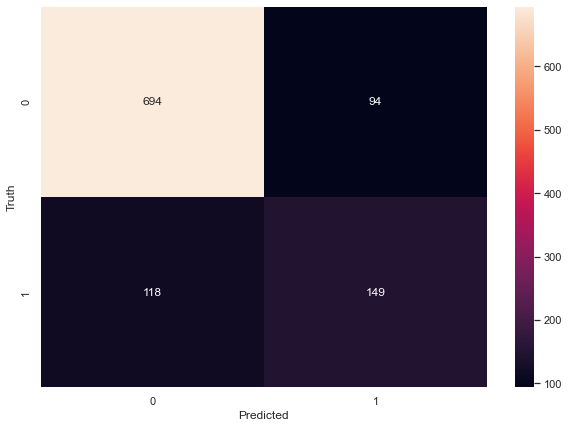

In [202]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# we achive precision & accuracy of 85 % and 80%, in this case precision is more important because our dataset is imbalanced,